In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Q7

In [2]:
dts = [datetime(2011,1,1),datetime(2011,2,1)]
s = pd.Series(np.random.randn(2),index=dts)
s

2011-01-01   -0.642070
2011-02-01   -0.749639
dtype: float64

In [3]:
s.index[0]

Timestamp('2011-01-01 00:00:00')

In [4]:
dt = datetime.strptime("2022-10-20", "%Y-%m-%d")
out = dt.strftime("%d/%m/%Y")
out

'20/10/2022'

In [5]:
rng = pd.date_range("2000-01-01" , periods=12, freq="T")
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [41]:
help(ts.resample("5min").ohlc)

Help on method ohlc in module pandas.core.resample:

ohlc(*args, **kwargs) method of pandas.core.resample.DatetimeIndexResampler instance
    Compute open, high, low and close values of a group, excluding missing values.
    
    For multiple groupings, the result index will be a MultiIndex
    
    Returns
    -------
    DataFrame
        Open, high, low and close values within each group.
    
    Examples
    --------
    
    For SeriesGroupBy:
    
    >>> lst = ['SPX', 'CAC', 'SPX', 'CAC', 'SPX', 'CAC', 'SPX', 'CAC',]
    >>> ser = pd.Series([3.4, 9.0, 7.2, 5.2, 8.8, 9.4, 0.1, 0.5], index=lst)
    >>> ser
    SPX     3.4
    CAC     9.0
    SPX     7.2
    CAC     5.2
    SPX     8.8
    CAC     9.4
    SPX     0.1
    CAC     0.5
    dtype: float64
    >>> ser.groupby(level=0).ohlc()
         open  high  low  close
    CAC   9.0   9.4  0.5    0.5
    SPX   3.4   8.8  0.1    0.1
    
    For DataFrameGroupBy:
    
    >>> data = {2022: [1.2, 2.3, 8.9, 4.5, 4.4, 3, 2 , 1],
    ..

# Q1

In [7]:
df = pd.DataFrame(
    [[1,1,1],
    [2,2,2],
    [1,2,1],
    [2,1,1]], index=["one","two","three","four"], columns=pd.Index(["A","B","C"], name="MyPlot"))
df.index.name = "IDX"
df

MyPlot,A,B,C
IDX,,,
one,1,1,1
two,2,2,2
three,1,2,1
four,2,1,1


<Axes: xlabel='IDX'>

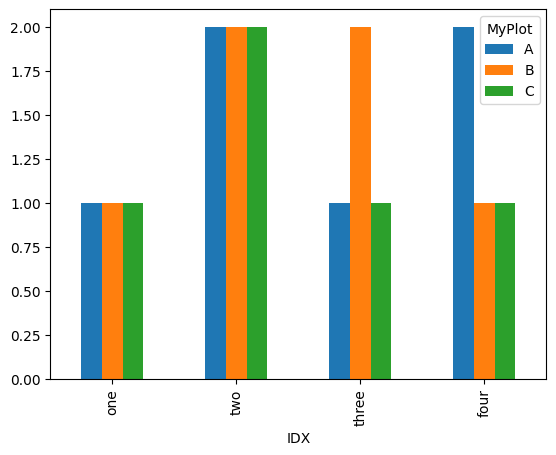

In [8]:
df.plot.bar()

In [9]:
df.pivot_table(["B"],index=["A"])

MyPlot,B
A,
1,1.5
2,1.5


In [10]:
df.apply(lambda x: x.max()-x.min() , axis=0)

MyPlot
A    1
B    1
C    1
dtype: int64

In [11]:
# g
num = np.zeros((2,3))
np.insert(num,[2],[[1,2,3],[4,5,6]], axis=0)


array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 2., 3.],
       [4., 5., 6.]])

In [12]:
np.random.normal(10,2,(2,3))

array([[ 7.65247102,  8.42972737, 10.35452296],
       [ 8.19788379, 11.17058365,  9.98842456]])

In [13]:
# k
df = pd.DataFrame({
    "key": ["a","b","c"]*4,
    "value" : np.arange(12.0)
})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [14]:
grp = df.groupby("key")
grp.transform(lambda x : x*2)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
5,10.0
6,12.0
7,14.0
8,16.0
9,18.0


# Q5

In [15]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [16]:
df["key"].map(lambda x: x.upper())

0     A
1     B
2     C
3     A
4     B
5     C
6     A
7     B
8     C
9     A
10    B
11    C
Name: key, dtype: object

In [17]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [18]:
df.set_index(["key"])

,value
key,
a,0.0
b,1.0
c,2.0
a,3.0
b,4.0
c,5.0
a,6.0
b,7.0
c,8.0


# Q5

In [19]:
left = pd.DataFrame({
    "key1": ["foo","foo","bar"],
    "key2" : ["one", "two" , "one"],
    "lval" : [1,2,3]
})
right = pd.DataFrame({
    "key1": ["foo","foo","bar","bar"],
    "key2" : ["one", "one","two" , "two"],
    "lval" : [4,5,6,7]
})
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [20]:
left.sort_values(by="key2",ascending=False).lval.cumsum()

1    2
0    3
2    6
Name: lval, dtype: int64

In [21]:
right

,key1,key2,lval
0,foo,one,4
1,foo,one,5
2,bar,two,6
3,bar,two,7


In [22]:
pd.merge(left,right,on=["key1"])

,key1,key2_x,lval_x,key2_y,lval_y
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,two,6
5,bar,one,3,two,7


In [23]:
left.append(right)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df.iloc[:2,:]

,key,value
0,a,0.0
1,b,1.0


# Q4

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

Math = np.random.randint(50,100,10)
Science= np.random.randint(50,100,10)

In [ ]:
n1 = np.arange(len(Math))
n2 = np.arange(len(Science))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

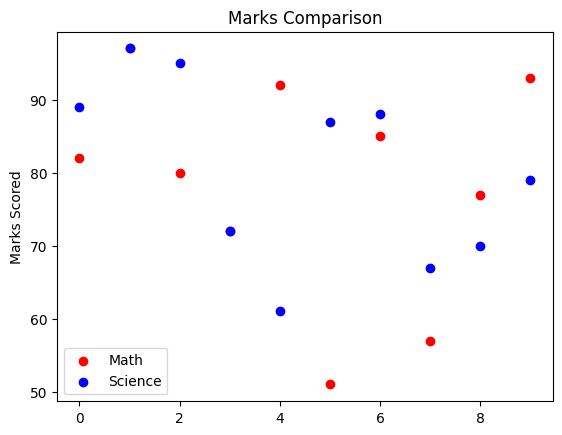

In [ ]:
plt.scatter(n1, Math, color="red", label="Math")
plt.scatter(n2, Science, color="blue", label="Science")
plt.ylabel("Marks Scored")
plt.title("Marks Comparison")
plt.legend(loc="best")